In [2]:
#initial code implemented following LinearRegression.pdf on canvas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
iterations = 1500; 
alpha = 0.1; 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/pcur/ECGR-4105/main/Homework%200/D3.csv')
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M 

100

In [5]:
x1_raw = df.values[:, 0]  # get input values from first column 
x2_raw = df.values[:, 1]  # get input values from second column
x3_raw = df.values[:, 2]  # get input values from third column
y = df.values[:, 3]   # get output values from fourth column

m = len(y) # Number of training examples 


In [6]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((m, 1)) 
#X_0[:5] 

In [7]:
# Using reshape function convert X 1D array to 2D array of dimension Mx1
X_1 = x1_raw.reshape(m, 1) 
X_2 = x2_raw.reshape(m, 1)
X_3 = x3_raw.reshape(m, 1)
#X_1[:10] 

In [8]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X1 = np.hstack((X_0, X_1)) 
X2 = np.hstack((X_0, X_2)) 
X3 = np.hstack((X_0, X_3)) 
#X[:5]

In [9]:
theta1 = np.zeros(2) 
theta2 = np.zeros(2) 
theta3 = np.zeros(2) 
#theta 

In [10]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [11]:
# Lets compute the cost for theta values 
cost1 = compute_cost(X1, y, theta1)
cost2 = compute_cost(X2, y, theta2)
cost3 = compute_cost(X3, y, theta3)
#print('The cost for given values of theta_0 and theta_1 =', cost1) 

In [12]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y_raw : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history

In [13]:
theta1 = [0., 0.] 
theta2 = [0., 0.] 
theta3 = [0., 0.] 

In [14]:
theta1, cost_history1 = gradient_descent(X1, y, theta1, alpha, iterations)
theta2, cost_history2 = gradient_descent(X2, y, theta2, alpha, iterations)
theta3, cost_history3 = gradient_descent(X3, y, theta3, alpha, iterations)
#print('Final value of theta =', theta1)
#print('Final value of theta =', theta2)
#print('Final value of theta =', theta3)
#print('cost_history =', cost_history1) 
#linear model in form h = t1*x + t0
#Part 1
print('Linear Model of X1:', theta1[1], '* x1 +', theta1[0])
print('Linear Model of X2:', theta2[1], '* x2 +', theta2[0])
print('Linear Model of X3:', theta3[1], '* x3 +', theta3[0])

Linear Model of X1: -2.038336633650798 * x1 + 5.927948918061593
Linear Model of X2: 0.557607610332605 * x2 + 0.7360604300947892
Linear Model of X3: -0.5204828843001037 * x3 + 2.8714221039882006


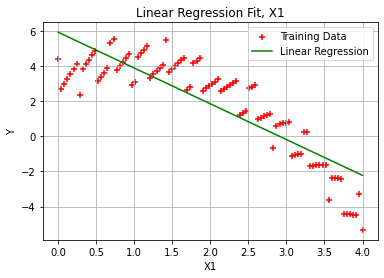

In [15]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
#Part 2
plt.scatter(X1[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X1[:,1],X1.dot(theta1), color='green', label='Linear Regression') 
 
plt.grid() 
plt.xlabel('X1') 
plt.ylabel('Y') 
plt.title('Linear Regression Fit, X1') 
plt.legend() 

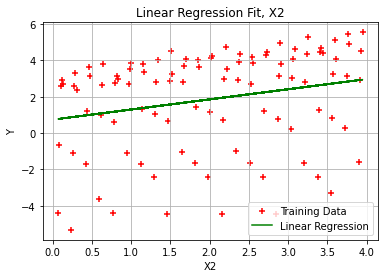

In [16]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X2[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X2[:,1],X2.dot(theta2), color='green', label='Linear Regression') 
 
plt.grid() 
plt.xlabel('X2') 
plt.ylabel('Y') 
plt.title('Linear Regression Fit, X2') 
plt.legend() 

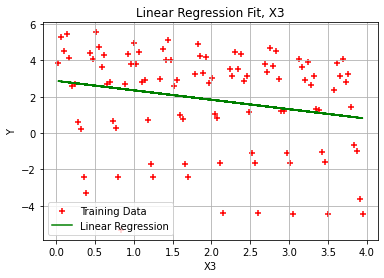

In [17]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X3[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X3[:,1],X3.dot(theta3), color='green', label='Linear Regression') 
 
plt.grid() 
plt.xlabel('X3') 
plt.ylabel('Y') 
plt.title('Linear Regression Fit, X3') 
plt.legend()

Text(0.5, 1.0, 'Loss Over Iteration, X1')

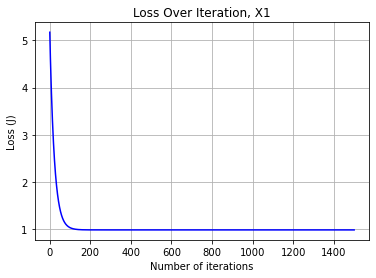

In [18]:
plt.plot(range(1, iterations + 1),cost_history1, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over Iteration, X1') 

Text(0.5, 1.0, 'Loss Over Iteration, X2')

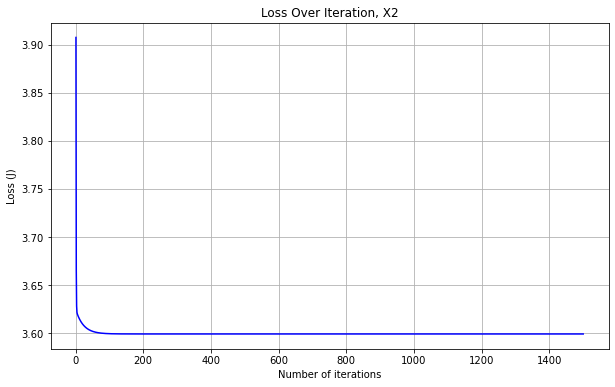

In [19]:
plt.plot(range(1, iterations + 1),cost_history2, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over Iteration, X2') 

Text(0.5, 1.0, 'Loss Over Iteration, X3')

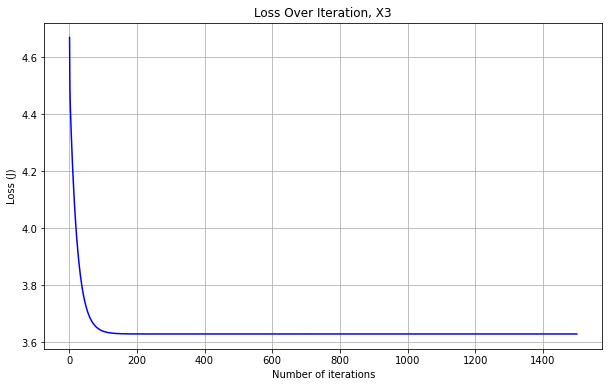

In [20]:
plt.plot(range(1, iterations + 1),cost_history3, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over Iteration, X3') 

Problem 2

In [21]:
X_poly = np.hstack((X_0, X_1, X_2, X_3))
theta_poly = np.zeros(4) 
cost_poly = compute_cost(X_poly, y, theta_poly)
theta_poly, cost_history_poly = gradient_descent(X_poly, y, theta_poly, alpha, iterations)
#linear model in form h = t1*x + t0
#Part 1
print('Linear Model of X_poly:', theta_poly[1], '* x1 +', theta_poly[0])

Linear Model of X_poly: -2.003719050517275 * x1 + 5.31416562749957


Text(0.5, 1.0, 'Loss Over Iteration, X1')

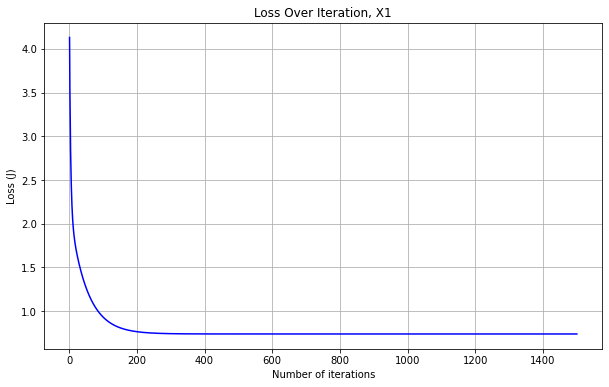

In [22]:
#Part 2
plt.plot(range(1, iterations + 1),cost_history_poly, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Loss Over Iteration, X1') 

In [24]:
# Part 4: Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)
y_poly111 = theta_poly[0] + theta_poly[1]*(1) + theta_poly[2]*(1) + theta_poly[3]*(1)
y_poly204 = theta_poly[0] + theta_poly[1]*(2) + theta_poly[2]*(0) + theta_poly[3]*(4)
y_poly321 = theta_poly[0] + theta_poly[1]*(3) + theta_poly[2]*(2) + theta_poly[3]*(1)

print('y @ (1,1,1):', y_poly111)
print('y @ (2,0,4):', y_poly204)
print('y @ (3,2,1):', y_poly321)

y @ (1,1,1): 3.577408529345461
y @ (2,0,4): 0.2443209702176521
y @ (3,2,1): 0.10253401973591902
